In [1]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
#     -O /tmp/rps.zip
  

In [2]:

# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
#     -O /tmp/rps-test-set.zip

In [3]:
import os 
import zipfile 

local_zip='/tmp/rps.zip'
zip_ref=zipfile.ZipFile(local_zip,'r') 
zip_ref.extractall('/tmp') 
zip_ref.close() 

local_zip='/tmp/rps-test-set.zip'
zip_ref=zipfile.ZipFile(local_zip,'r') 
zip_ref.extractall('/tmp') 
zip_ref.close() 

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))


rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-113.png', 'rock05ck01-088.png', 'rock07-k03-061.png', 'rock06ck02-014.png', 'rock04-109.png', 'rock06ck02-073.png', 'rock02-062.png', 'rock06ck02-059.png', 'rock04-108.png', 'rock02-009.png']
['paper02-013.png', 'paper04-048.png', 'paper07-067.png', 'paper05-101.png', 'paper07-094.png', 'paper04-100.png', 'paper05-075.png', 'paper01-039.png', 'paper05-095.png', 'paper06-007.png']
['testscissors03-094.png', 'scissors03-031.png', 'scissors02-014.png', 'testscissors03-040.png', 'scissors01-019.png', 'testscissors01-067.png', 'testscissors02-119.png', 'scissors04-107.png', 'scissors02-081.png', 'testscissors02-093.png']


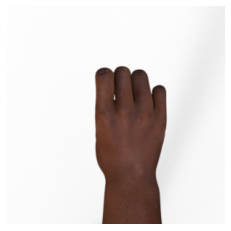

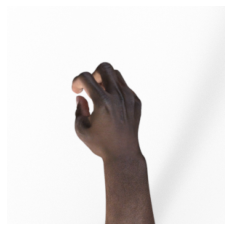

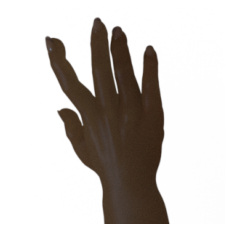

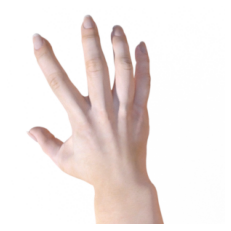

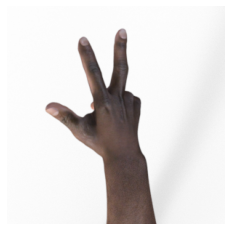

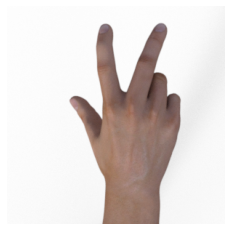

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [8]:
import tensorflow as tf 
import keras.preprocessing 
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 

TRAINING_DIR = "/tmp/rps/"
VALIDATION_DIR = "/tmp/rps-test-set/"

training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1./255)



train_generator=training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)
validation_generator=validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)


 


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


# model.summary()
# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#              metrics=['accuracy']) 
# history=model.fit_generator(train_generator,
#                             epochs=25,
#                             validation_data=validation_generator,
#                             verbose=1) 
# model.save('rps.h5') 

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
____

79/79 [==============================] - 18s 224ms/step - loss: 0.0859 - acc: 0.9782 - val_loss: 0.1967 - val_acc: 0.9005


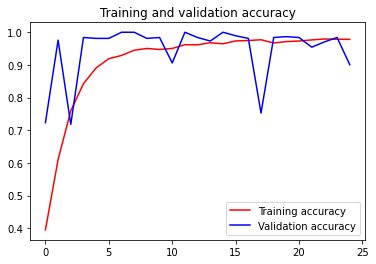

<Figure size 432x288 with 0 Axes>

In [9]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()